## 샘플 데이터셋 만들기 (차트 이미지 변환)

- 종목 : BTC-KRW(업비트), BTC/USDT(바이낸스)
- 데이터 : 4시간봉(pyupbit 기준 'minute240')
- 데이터 수 : count=300 (4시간봉이므로 50일 데이터)

- 이미지 변환 (양봉/음봉 구분은 부차적)
- 이미지 변환 및 저장, 로드 타임스탬프 확인

## Import Library

In [57]:
# ! pip install bokeh
# ! pip install selenium
# ! pip install mpl_finance
# ! pip install opencv-python
# ! pip install -U kaleido

In [2]:
import pyupbit 
import ccxt 
import pprint
import pandas as pd 
import matplotlib.pyplot as plt
import time 
import matplotlib.image as img 
import cv2

#-- bokeh
from bokeh.plotting import figure, show, output_notebook
from bokeh.layouts import gridplot
from  bokeh.models.formatters import NumeralTickFormatter
from bokeh.io import export_png

#-- mpl finance 
import mpl_finance
# import matplotlib.finance as matfin

#-- plotly
import plotly.graph_objects as go


## Upbit

In [3]:
tickers = pyupbit.get_tickers(fiat="KRW") # 원화 거래소 
print(tickers)
print(len(tickers))

['KRW-BTC', 'KRW-ETH', 'KRW-NEO', 'KRW-MTL', 'KRW-LTC', 'KRW-XRP', 'KRW-ETC', 'KRW-OMG', 'KRW-SNT', 'KRW-WAVES', 'KRW-XEM', 'KRW-QTUM', 'KRW-LSK', 'KRW-STEEM', 'KRW-XLM', 'KRW-ARDR', 'KRW-ARK', 'KRW-STORJ', 'KRW-GRS', 'KRW-REP', 'KRW-ADA', 'KRW-SBD', 'KRW-POWR', 'KRW-BTG', 'KRW-ICX', 'KRW-EOS', 'KRW-TRX', 'KRW-SC', 'KRW-ONT', 'KRW-ZIL', 'KRW-POLY', 'KRW-ZRX', 'KRW-LOOM', 'KRW-BCH', 'KRW-BAT', 'KRW-IOST', 'KRW-RFR', 'KRW-CVC', 'KRW-IQ', 'KRW-IOTA', 'KRW-MFT', 'KRW-ONG', 'KRW-GAS', 'KRW-UPP', 'KRW-ELF', 'KRW-KNC', 'KRW-BSV', 'KRW-THETA', 'KRW-QKC', 'KRW-BTT', 'KRW-MOC', 'KRW-ENJ', 'KRW-TFUEL', 'KRW-MANA', 'KRW-ANKR', 'KRW-AERGO', 'KRW-ATOM', 'KRW-TT', 'KRW-CRE', 'KRW-MBL', 'KRW-WAXP', 'KRW-HBAR', 'KRW-MED', 'KRW-MLK', 'KRW-STPT', 'KRW-ORBS', 'KRW-VET', 'KRW-CHZ', 'KRW-STMX', 'KRW-DKA', 'KRW-HIVE', 'KRW-KAVA', 'KRW-AHT', 'KRW-LINK', 'KRW-XTZ', 'KRW-BORA', 'KRW-JST', 'KRW-CRO', 'KRW-TON', 'KRW-SXP', 'KRW-HUNT', 'KRW-PLA', 'KRW-DOT', 'KRW-SRM', 'KRW-MVL', 'KRW-STRAX', 'KRW-AQT', 'KRW-GLM', 

In [4]:
# Option Config 
ticker = 'KRW-BTC'
count = 300
interval = 'minute240'

In [5]:

# 차트 데이터 
# ohlcv : 고가/시가/저가/종가/거래량 

df = pyupbit.get_ohlcv(ticker, interval=interval, count=count)
display(df.head())
display(df.tail())

,open,high,low,close,volume,value
2022-03-21 17:00:00,50222000.0,50580000.0,50159000.0,50477000.0,692.803685,3.489898e+10
2022-03-21 21:00:00,50446000.0,50600000.0,50000000.0,50316000.0,1000.968371,5.033836e+10
2022-03-22 01:00:00,50328000.0,50341000.0,49931000.0,50194000.0,554.325745,2.775154e+10
2022-03-22 05:00:00,50194000.0,50398000.0,50061000.0,50128000.0,351.703912,1.766058e+10
2022-03-22 09:00:00,50128000.0,51397000.0,50013000.0,51282000.0,2218.545823,1.128513e+11


,open,high,low,close,volume,value
2022-05-09 21:00:00,43826000.0,44159000.0,42920000.0,43059000.0,1347.941994,5.854058e+10
2022-05-10 01:00:00,43059000.0,43277000.0,41344000.0,41734000.0,2022.107574,8.539707e+10
2022-05-10 05:00:00,41760000.0,42340000.0,40719000.0,41002000.0,1869.620244,7.740850e+10
2022-05-10 09:00:00,41000000.0,42147000.0,40150000.0,41130000.0,2877.731514,1.187948e+11
2022-05-10 13:00:00,41130000.0,42755000.0,41000000.0,42733000.0,1319.028898,5.520426e+10


In [6]:
df.shape

(300, 6)

### 차트 데이터 이미지 변환
- 100개씩 이미지 생성해서 소요 시간 비교 

#### Bokeh Version

In [7]:
df.reset_index(inplace=True)

In [17]:
start = time.time()
output_notebook()

for i in range(100):    
    inc = df.close >= df.open
    dec = df.open > df.close

    p_candlechart = figure(plot_width=1050, plot_height=300, x_range=(-1, len(df))
    , tools=['xpan, crosshair, xwheel_zoom, reset, hover, box_select, save'])
    p_candlechart.segment(df.index[inc], df.high[inc], df.index[inc], df.low[inc], color='red')
    p_candlechart.segment(df.index[dec], df.high[dec], df.index[dec], df.low[dec], color='green')
    p_candlechart.vbar(df.index[inc], 0.5, df.open[inc], df.close[inc], fill_color='red', line_color='red')
    p_candlechart.vbar(df.index[dec], 0.5, df.open[dec], df.close[dec], fill_color='green', line_color='green')

    major_label = {
        i: date.strftime('%Y-%m-%d') for i, date in enumerate(pd.to_datetime(df['index']))
    }
    major_label.update({len(df) : ''})
    p_candlechart.xaxis.major_label_overrides = major_label
    p_candlechart.yaxis[0].formatter = NumeralTickFormatter(format='0,0')

    p = gridplot([[p_candlechart]])
    # show(p)

    export_png(p, filename=f"./result/plot{i}.png")

print('소요시간: ', time.time()-start)

Loading BokehJS ...

소요시간:  143.51834440231323


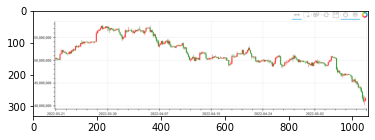

In [19]:
img_test = img.imread('./result/plot1.png')
plt.imshow(img_test)
plt.show()

#### mpl_finance Version

In [35]:
start = time.time()

for i in range(100):

    fig = plt.figure(figsize=(8,4))
    ax = fig.add_subplot(111)

    mpl_finance.candlestick2_ohlc(ax, df['open'], df['high'], df['low'], df['close'], width=0.5, colorup='r', colordown='b')
    # plt.show()

    plt.savefig(f'./result/mpl_finace_plot{i}.png')
    plt.close(fig)

print('소요시간: ', time.time()-start)

소요시간:  26.228511810302734


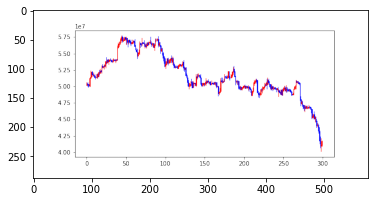

In [36]:
img_test = img.imread('./result/mpl_finace_plot1.png')
plt.imshow(img_test)
plt.show()

#### Plotly Version 

In [10]:
start = time.time()

for i in range(100):

    data = [{
        'type': 'candlestick',
        'x': df.index,
        'open': df.open, 
        'close': df.close,
        'high': df.high, 
        'low': df.low,
        'name': ticker,
        'increasing_line_color': 'red',
        'decreasing_line_color': 'blue',
        'showlegend': False 
    }]

    fig = go.Figure(data=data)
    # fig.show()

    fig.write_image(f'./result/plotly_version{i}.png')

print('소요시간: ', time.time()-start)


소요시간:  29.019928693771362


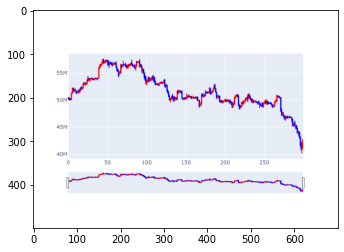

In [12]:
img_test = img.imread('./result/plotly_version1.png')
plt.imshow(img_test)
plt.show()

## Binance

In [13]:
binance = ccxt.binance()
markets = binance.load_markets()

print(len(markets)) 

2036


In [20]:
# Option Config 
ticker = 'BTC/USDT'
count = 300
interval = '4h'

In [21]:
btc = binance.fetch_ticker(ticker)
pprint.pprint(btc)  # 현재가 조회

{'ask': 32511.58,
 'askVolume': 1.30866,
 'average': 32998.69,
 'baseVolume': 228037.675668,
 'bid': 32511.57,
 'bidVolume': 0.35428,
 'change': -974.22,
 'close': 32511.58,
 'datetime': '2022-05-10T06:36:12.873Z',
 'high': 33777.0,
 'info': {'askPrice': '32511.58000000',
          'askQty': '1.30866000',
          'bidPrice': '32511.57000000',
          'bidQty': '0.35428000',
          'closeTime': '1652164572873',
          'count': '3029275',
          'firstId': '1352334405',
          'highPrice': '33777.00000000',
          'lastId': '1355363679',
          'lastPrice': '32511.58000000',
          'lastQty': '0.01024000',
          'lowPrice': '29730.40000000',
          'openPrice': '33485.80000000',
          'openTime': '1652078172873',
          'prevClosePrice': '33485.80000000',
          'priceChange': '-974.22000000',
          'priceChangePercent': '-2.909',
          'quoteVolume': '7211187563.21581696',
          'symbol': 'BTCUSDT',
          'volume': '228037.675668

In [24]:
# 과거부터 현재까지 차트 데이터 조회 
# ohlcv : 고가/시가/저가/종가/거래량 

binance = ccxt.binance()
btc_ohlcv = binance.fetch_ohlcv(ticker, interval, limit=count)  

df = pd.DataFrame(btc_ohlcv, columns = ['datetime', 'open', 'high', 'low', 'close', 'volume'])
df['datetime'] = pd.to_datetime(df['datetime'], unit='ms')
df.set_index('datetime', inplace=True)

In [25]:
df.shape

(300, 5)

### 차트 데이터 이미지 변환
- 100개씩 이미지 생성해서 소요 시간 비교 

#### Bokeh Version

In [27]:
df.reset_index(inplace=True)

In [30]:
start = time.time()
output_notebook()

for i in range(100):    
    inc = df.close >= df.open
    dec = df.open > df.close

    p_candlechart = figure(plot_width=1050, plot_height=300, x_range=(-1, len(df))
    , tools=['xpan, crosshair, xwheel_zoom, reset, hover, box_select, save'])
    p_candlechart.segment(df.index[inc], df.high[inc], df.index[inc], df.low[inc], color='red')
    p_candlechart.segment(df.index[dec], df.high[dec], df.index[dec], df.low[dec], color='green')
    p_candlechart.vbar(df.index[inc], 0.5, df.open[inc], df.close[inc], fill_color='red', line_color='red')
    p_candlechart.vbar(df.index[dec], 0.5, df.open[dec], df.close[dec], fill_color='green', line_color='green')

    major_label = {
        i: date.strftime('%Y-%m-%d') for i, date in enumerate(pd.to_datetime(df['datetime']))
    }
    major_label.update({len(df) : ''})
    p_candlechart.xaxis.major_label_overrides = major_label
    p_candlechart.yaxis[0].formatter = NumeralTickFormatter(format='0,0')

    p = gridplot([[p_candlechart]])
    # show(p)

    export_png(p, filename=f"./binance_result/bokeh_plot{i}.png")

print('소요시간: ', time.time()-start)

Loading BokehJS ...

소요시간:  144.6213891506195


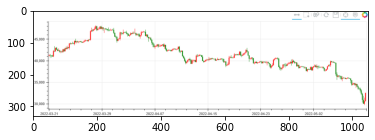

In [31]:
img_test = img.imread('./binance_result/bokeh_plot1.png')
plt.imshow(img_test)
plt.show()

#### mpl_finance Version

In [32]:
start = time.time()

for i in range(100):

    fig = plt.figure(figsize=(8,4))
    ax = fig.add_subplot(111)

    mpl_finance.candlestick2_ohlc(ax, df['open'], df['high'], df['low'], df['close'], width=0.5, colorup='r', colordown='b')
    # plt.show()

    plt.savefig(f'./binance_result/mpl_finace_plot{i}.png')
    plt.close(fig)

print('소요시간: ', time.time()-start)

소요시간:  26.079933166503906


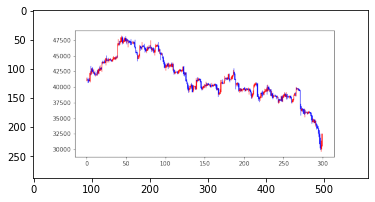

In [33]:
img_test = img.imread('./binance_result/mpl_finace_plot1.png')
plt.imshow(img_test)
plt.show()

#### Plotly Version 

In [34]:
start = time.time()

for i in range(100):

    data = [{
        'type': 'candlestick',
        'x': df.index,
        'open': df.open, 
        'close': df.close,
        'high': df.high, 
        'low': df.low,
        'name': ticker,
        'increasing_line_color': 'red',
        'decreasing_line_color': 'blue',
        'showlegend': False 
    }]

    fig = go.Figure(data=data)
    # fig.show()

    fig.write_image(f'./binance_result/plotly_version{i}.png')

print('소요시간: ', time.time()-start)


소요시간:  30.768033742904663


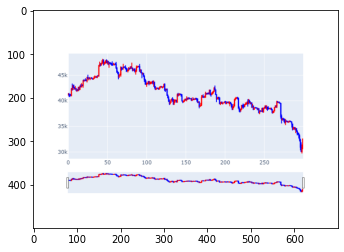

In [35]:
img_test = img.imread('./binance_result/plotly_version1.png')
plt.imshow(img_test)
plt.show()